In [1]:
import os 
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import itertools
import seaborn as sn
import pandas as pd
resultExact = "C:/Users/davie/Desktop/results/leaveout"
resultGenus = "C:/Users/davie/Desktop/results/leaveoutgenus"
resultFamily = "C:/Users/davie/Desktop/results/leaveoutfamily"
resultOrder = "C:/Users/davie/Desktop/results/leaveoutorder"
resultClass = "C:/Users/davie/Desktop/results/leaveoutclass"
files = os.listdir(resultExact)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
files[0]

'BaseCSV#plantPollinatorUSA'

In [5]:
with open(resultFamily+"/Mangal#WEB38",'rb') as f:
    rs = pickle.load(f)

# set([x[1] for x in rs[0][0]])
# len(rs[0][2])
# gen = list(set([x[1] for x in rs[0][0]]))
gen = rs[0][0]
actual = rs[0][1]
allInter = rs[0][2]
pass_in = (gen,actual,allInter)
calcPrecision(pass_in), calcRecall(pass_in)
# perf_measure(actual,gen)
# for item in allInter:
#     if isinstance(item,str): print("HHHHHH")
#     print(item)


(0.5070422535211268, 0.8372093023255814)

In [10]:
def drawConfusionMatrixForLevel(path):
    precs = []
    recs = []
    files = os.listdir(path)
    cnt = 0
    counter = 0
    for item in files:
        print(item)
        with open(path+"/"+item,'rb') as f:
            arr = pickle.load(f)
            result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]

            pass_in = (result,actual,allInteractions)
            precs.append(calcPrecision(pass_in))
            recs.append(calcRecall(pass_in))
            if precs[-1] < 0.05 and recs[-1] < 0.05:
                cnt +=1 
            counter += 1
            if counter == 10:
                break
    fig, ax = plt.subplots()
    hist, xbins, ybins, im = plt.hist2d(recs, precs, bins=[10,10])

    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.05,ybins[i]+0.05, hist.T[i,j], 
                    color="w", ha="center", va="center")
    #fontweight="bold"

#     plt.show()
#     plt.hist2d(recs, precs, bins=[10,10])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Counts')

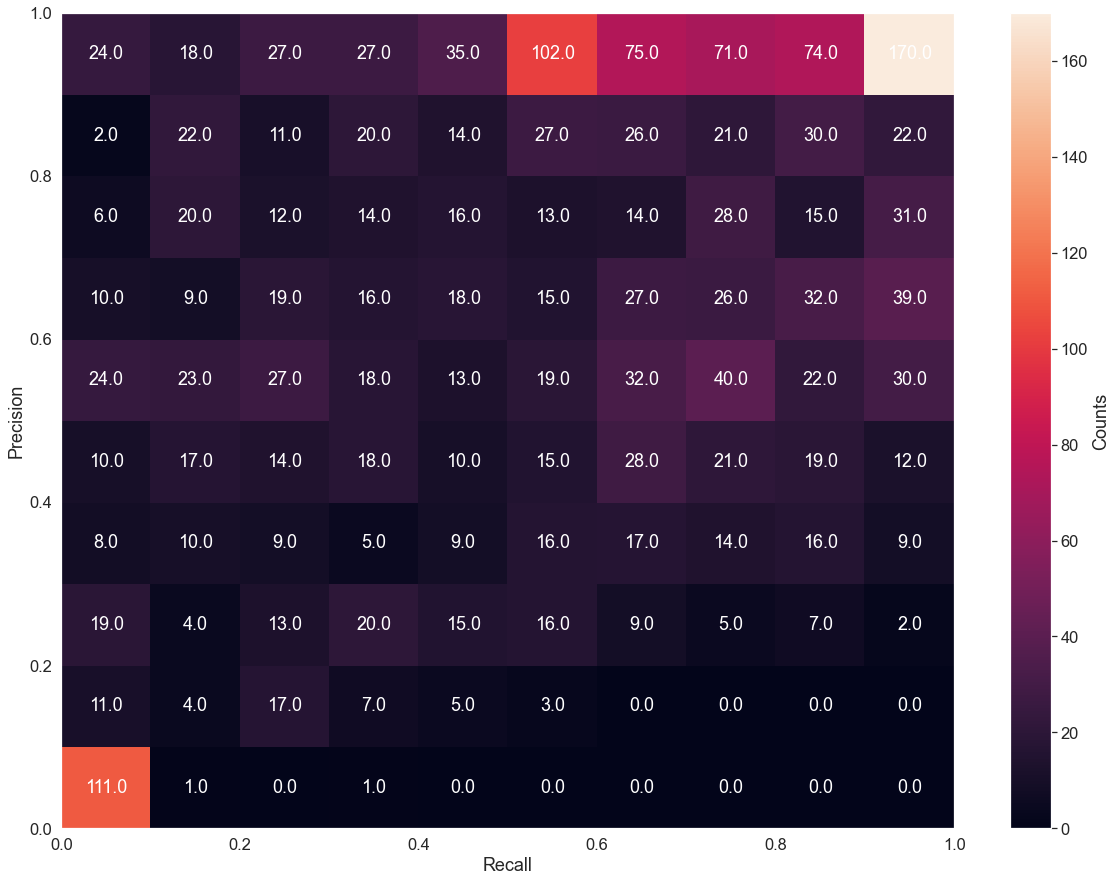

In [19]:
drawConfusionMatrixForLevel(resultExact)

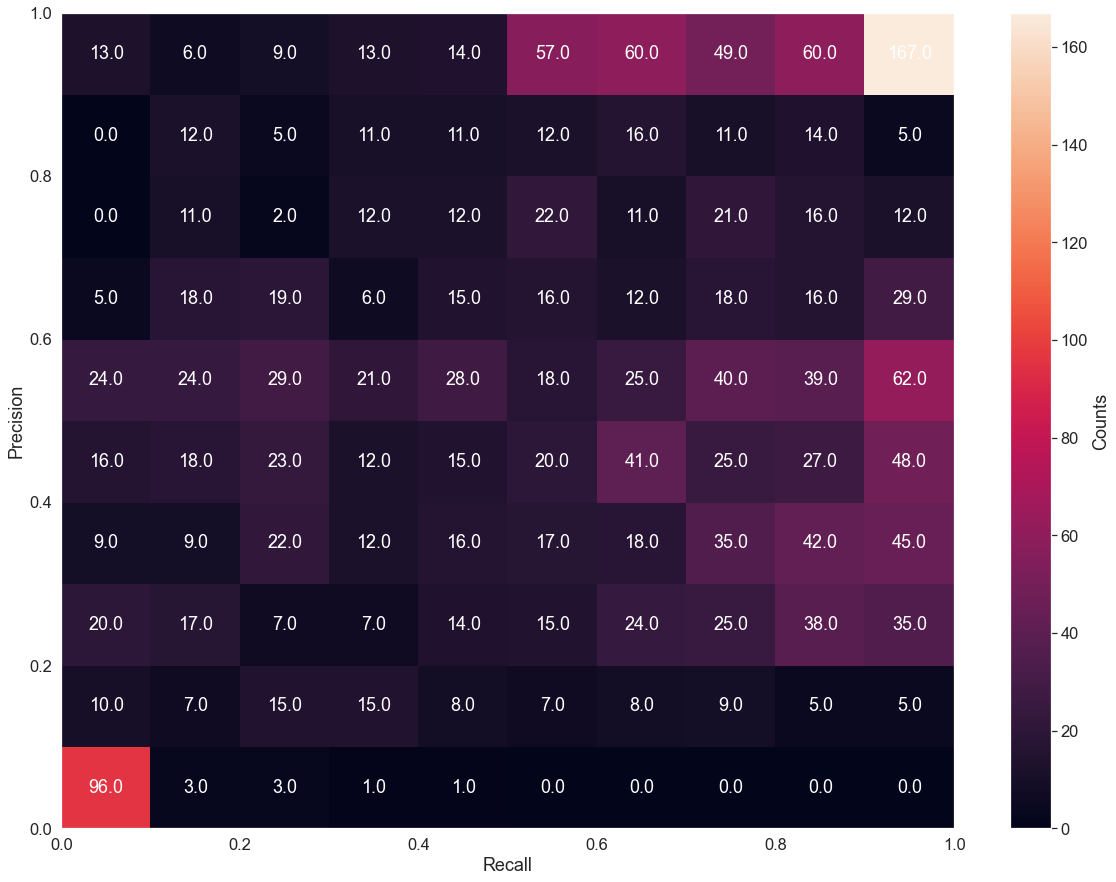

In [20]:
drawConfusionMatrixForLevel(resultGenus)

In [13]:
drawConfusionMatrixForLevel(resultFamily)

BaseCSV#plantPollinatorUSA
CALCD 1444
CALCD 1444
BaseCSV#plantSeed
CALCD 1600
CALCD 1600
BaseCSV#texasGrasslands
CALCD 5476
CALCD 5476
BaseCSV#texasGrasslands2
CALCD 6084
CALCD 6084
BaseCSV#US_Grasslands
CALCD 137641


KeyboardInterrupt: 

In [ ]:
drawConfusionMatrixForLevel(resultOrder)

In [ ]:
drawConfusionMatrixForLevel(resultClass)

In [ ]:
len(list(filter(lambda x: x[0]<0.5 and x[1]<0.5,list(zip(precs,recs)))))

In [ ]:
list(itertools.product([1,2,3],[5,6]))

In [12]:
def calcPrecision(results):
    try:
        generated,real,allInter = results
        allInter = getTrueAllInter(allInter)
        tp = getTruePossitives(generated,real,allInter)
        fp = getFalsePositives(generated,real,allInter)
        return tp/(tp+fp)
    except Exception as e:
        return 0.0
    
def calcRecall(results):
    try:
        generated,real,allInter = results
        allInter = getTrueAllInter(allInter)
        tp = getTruePossitives(generated,real,allInter)
        fn = getFalseNegatives(generated,real,allInter)
        return tp/(tp+fn)   
    except Exception as e:
        return 0.0

def getTrueAllInter(allInter):
    allNames = list(set(itertools.chain(*allInter)))
    allNames= list(set(itertools.product(allNames,allNames)))
    print("CALCD " + str(len(allNames)))
    return allNames

def showConfusionMatrix(results):
    generated,real,allInter = results
    allInter = getTrueAllInter(allInter)
    tp = getTruePossitives(generated,real,allInter)
    fp = getFalsePositives(generated,real,allInter)
    fn = getFalseNegatives(generated,real,allInter)
    tn = getTrueNegatives(generated,real,allInter)
    array = [[tp,fp],[fn,tn]]
    df_cm = pd.DataFrame(array)
    import seaborn as sns # for data visualization
    import matplotlib.pyplot as plt # for data visualization
    sns.set(font_scale=1.5)
    plt.figure(figsize = (10,7))
    x_axis_labels = ['Present Link','Not Present Link'] # labels for x-axis
    y_axis_labels = ['Present Link','Not Present Link'] # labels for y-axis
    ax = sns.heatmap(df_cm,cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True,fmt='g',annot_kws={"fontsize":20}) # create seaborn heatmap    
    plt.xlabel('Real', fontsize = 25) # x-axis label with fontsize 15
    plt.ylabel('Generated', fontsize = 25) # y-axis label with fontsize 15
    plt.show()


def getTruePossitives(generated,real,allInter):
    real = list(set(sortTuples(real)))
    generated = list(set(map(lambda x: sortSingleTuple(x[1]),generated)))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item in generated and item in real:
            cnt += 1
    return cnt

def getFalsePositives(generated,real,allInter):
    real = list(set(sortTuples(real)))
    generated = list(set(map(lambda x: sortSingleTuple(x[1]),generated)))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item in generated and item not in real:
            cnt += 1
    return cnt

def getFalseNegatives(generated,real,allInter):
    real = list(set(sortTuples(real)))
    generated = list(set(map(lambda x: sortSingleTuple(x[1]),generated)))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item not in generated and item in real:
            cnt += 1
    return cnt

def getTrueNegatives(generated,real,allInter):
    real = list(set(sortTuples(real)))
    generated = list(set(map(lambda x: sortSingleTuple(x[1]),generated)))
    allInter = list(set(sortTuples(allInter)))
    cnt = 0
    for item in allInter:
        if item not in generated and item not in real:
            cnt += 1
    return cnt

def sortTuples(setOfTuples):
    return set(map(sortSingleTuple,setOfTuples))

def sortSingleTuple(tup):
    x,y = tup
    if x < y:
        return (x,y)
    elif y < x:
        return (y,x)
    else:
        return (x,y)

In [15]:
precs = []
recs = []
cnt = 0
ocnt = 0
for item in files[:]:
    with open(resultExact+"/"+item,'rb') as f:
        arr = pickle.load(f)
        result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
        pass_in = (result,actual,allInteractions)
#         showConfusionMatrix(pass_in)
        if(calcPrecision(pass_in)) <= 0.1 and (calcRecall(pass_in))  <= 0.1:
            cnt += 1
            if getFalsePositives(*pass_in) == 0:
                ocnt += 1
print(ocnt/cnt)

0.8125


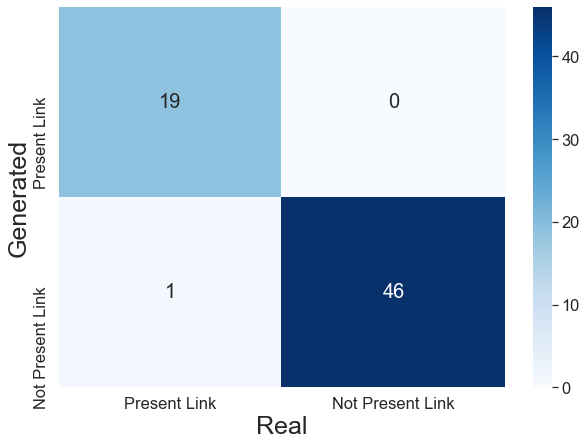

1.0 0.95
FoodsWebsCanberra#WEB45


In [16]:
precs = []
recs = []
item = 'FoodsWebsCanberra#WEB45'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

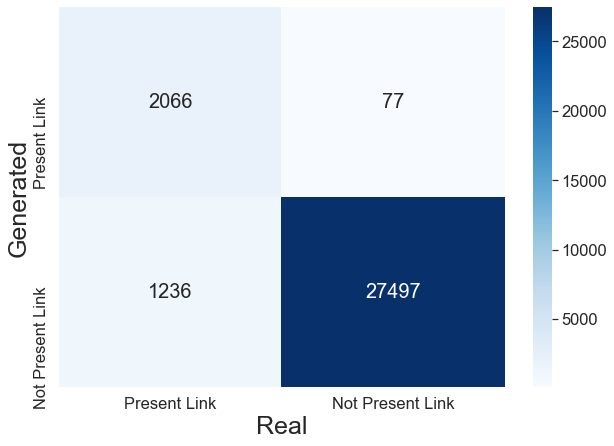

0.9640690620625292 0.6256814052089643
validation#reef_spnames


In [17]:
precs = []
recs = []
item = 'validation#reef_spnames'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

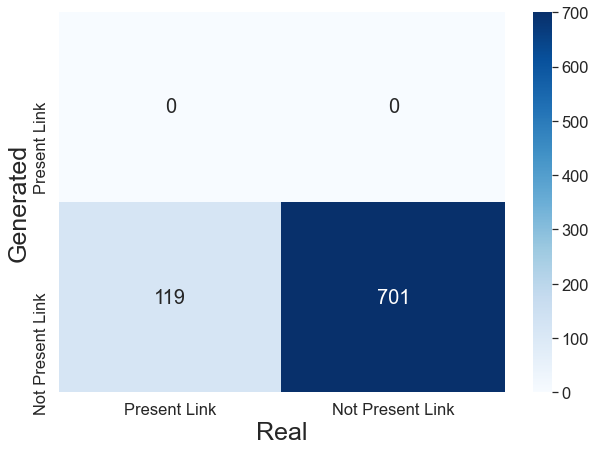

0.0 0.0
BaseCSV#plantSeed


In [18]:
precs = []
recs = []
item = 'BaseCSV#plantSeed'
with open(resultExact+"/"+item,'rb') as f:
    arr = pickle.load(f)
    result,actual,allInteractions,finalTime,translatedTime,done,notDone = arr[0]
    pass_in = (result,actual,allInteractions)
    showConfusionMatrix(pass_in)
    print(calcPrecision(pass_in),(calcRecall(pass_in)))
    print(item)

In [ ]:
!pip install matplotlib==3.1.0



In [ ]:
from Medeina import Web
w = Web("C:/Users/davie/Desktop/folds/FoodsWebsCanberra#WEB328")
len(w.stringNames)

In [ ]:
for item in w.stringNames:
    if 'paradisaea' in item: print(item,w.stringNames[item])

In [ ]:
w.linkMetas[3411]
len([w.linkMetas[l] for l in w.linkMetas if w.linkMetas[l]['dId']==10])

In [ ]:
from EcoNameTranslator import EcoNameTranslator
t = EcoNameTranslator().translate(['Blue bird of Paradise'])
t